# Importamos todas las Redes y librerías

In [1]:
import matplotlib.pylab as plt
import networkx as nx
import numpy as np
import pandas as pd
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data
a=ldata("yeast_AP-MS.txt");b=ldata("yeast_LIT.txt");d=ldata("yeast_Y2H.txt")
G = nx.Graph();G.add_edges_from(a)
H = nx.Graph();H.add_edges_from(b)
J = nx.Graph();J.add_edges_from(d)

# Tabla 1 de Zotenko

In [2]:
Cantidad_nodos=[G.number_of_nodes(),H.number_of_nodes(),J.number_of_nodes()]
                
Cantidad_enlaces=[G.number_of_edges(),H.number_of_edges(),J.number_of_edges()]
                
grados = [gra for (nom,gra) in G.degree()];grados_media_g=np.mean(np.asarray(grados))
grados = [gra for (nom,gra) in H.degree()];grados_media_h=np.mean(np.asarray(grados))
grados = [gra for (nom,gra) in J.degree()];grados_media_j=np.mean(np.asarray(grados))
Grado_medio=[grados_media_g,grados_media_h,grados_media_j]

cluster=[nx.average_clustering(G),nx.average_clustering(H),nx.average_clustering(J)]
                
trans=[nx.transitivity(G),nx.transitivity(H),nx.transitivity(J)]     

d = {'Cantidad de nodos': Cantidad_nodos, 'Cantidad de enlaces': Cantidad_enlaces, 'Grado medio': Grado_medio, 'Clustering medio (promedio)': cluster, 'Clustering medio (global)': trans}
Tabla_1=pd.DataFrame(data=d)
Tabla_1.index=["AP-MS","LIT","Y2H"]

print(Tabla_1)

       Cantidad de nodos  Cantidad de enlaces  Grado medio  \
AP-MS               1622                 9070    11.183724   
LIT                 1536                 2925     3.808594   
Y2H                 2018                 2930     2.903865   

       Clustering medio (promedio)  Clustering medio (global)  
AP-MS                     0.554636                   0.618590  
LIT                       0.292492                   0.346193  
Y2H                       0.046194                   0.023614  


# Tabla 2 de Zotenko

In [3]:
def proporcion_edges(RED1,RED2):
    cont = 0
    for i in RED1.edges:
        if i in RED2.edges:
            cont=cont+1
    return(cont/RED1.number_of_edges())
GH=proporcion_edges(G,H);GJ=proporcion_edges(G,J)
HG=proporcion_edges(H,G);HJ=proporcion_edges(H,J)
JG=proporcion_edges(J,G);JH=proporcion_edges(J,H)
col1=['AP-MS', GH, GJ];col2=[HG, 'LIT', HJ];col3=[JG, JH, 'Y2H']

Tabla_2=pd.DataFrame(data=[col1, col2, col3])
print(Tabla_2)

           0          1          2
0      AP-MS   0.143109  0.0286659
1   0.443761        LIT  0.0888889
2  0.0887372  0.0887372        Y2H


In [4]:
es=ldata("esenciales.txt")

for i in G.nodes:
    G.nodes[i]["es"] = 0

for n in es:
    if n[0] in G.nodes:
        G.nodes[n[0]]["es"] = 1

for i in J.nodes:
    J.nodes[i]["es"] = 0

for n in es:
    if n[0] in J.nodes:
        J.nodes[n[0]]["es"] = 1
        
for i in H.nodes:
    H.nodes[i]["es"] = 0

for n in es:
    if n[0] in H.nodes:
        H.nodes[n[0]]["es"] = 1

# Figura 1 de Zotenko

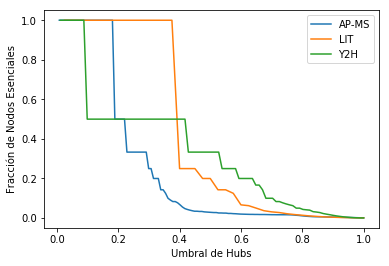

In [5]:
grados = [gra for (nom,gra) in G.degree()] # [lo_que_quiero  for los_elementos in iterable]
nombre = [nom for (nom,gra) in G.degree()] # [lo_que_quiero  for los_elementos in iterable]
Datos = np.asarray(grados)

frac=[]
x=[]

for i in range(max(Datos)):
    ese=0
    noese=0
    for j in range(len(Datos)):
        if Datos[j]>=i:
            if G.nodes[nombre[j]]['es']==1:
                ese=+1
            else:
                noese=noese+1
    frac.append(ese/float(ese+noese))
    xi=1-1/max(Datos)*i
    x.append(xi)
Gx=x.copy()
Gfrac=frac.copy()

grados = [gra for (nom,gra) in H.degree()] # [lo_que_quiero  for los_elementos in iterable]
nombre = [nom for (nom,gra) in H.degree()] # [lo_que_quiero  for los_elementos in iterable]
Datos = np.asarray(grados)

frac=[]
x=[]

for i in range(max(Datos)):
    ese=0
    noese=0
    for j in range(len(Datos)):
        if Datos[j]>=i:
            if H.nodes[nombre[j]]['es']==1:
                ese=+1
            else:
                noese=noese+1
    frac.append(ese/float(ese+noese))
    xi=1-1/max(Datos)*i
    x.append(xi)
Hx=x.copy()
Hfrac=frac.copy()

grados = [gra for (nom,gra) in J.degree()] # [lo_que_quiero  for los_elementos in iterable]
nombre = [nom for (nom,gra) in J.degree()] # [lo_que_quiero  for los_elementos in iterable]
Datos = np.asarray(grados)

frac=[]
x=[]

for i in range(max(Datos)):
    ese=0
    noese=0
    for j in range(len(Datos)):
        if Datos[j]>=i:
            if J.nodes[nombre[j]]['es']==1:
                ese=+1
            else:
                noese=noese+1
    frac.append(ese/float(ese+noese))
    xi=1-1/max(Datos)*i
    x.append(xi)
Jx=x.copy()
Jfrac=frac.copy() 

plt.plot(Gx,Gfrac,label='AP-MS');plt.plot(Hx,Hfrac,label='LIT');plt.plot(Jx,Jfrac,label='Y2H')
plt.legend();plt.ylabel("Fracción de Nodos Esenciales");plt.xlabel("Umbral de Hubs")
plt.show()

# Figura 3 de Zotenko

## Sacando al azar

In [6]:
import random 
def sacar_random(RED):
    GG=RED.copy() #Copio la red
    Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0] #Conjunto de nodos comp_gigante
    Componente_Gigante = GG.subgraph(Componente_Gigante_INT) #armo la RED con sólo la componente gigante
    cantidad_nodos_gigante = len(Componente_Gigante)

    paso=0
    dg=[]
    pasos=[]
    while len(Componente_Gigante)>1:
        paso+=1
        listanodos = [nom for (nom,gra) in Componente_Gigante.degree()]
        GG.remove_node(random.choice(listanodos))
        Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
        Componente_Gigante = GG.subgraph(Componente_Gigante_INT)
        fraccion=len(Componente_Gigante)/cantidad_nodos_gigante
        dg.append(fraccion)
        pasos.append(paso/cantidad_nodos_gigante)
        GG=Componente_Gigante.copy()
    return(pasos,dg)

## Sacando el de mayor grado

In [7]:
def sacar_grado(RED):
    GG=RED.copy() #Copio la red
    Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0] #Conjunto de nodos comp_gigante
    Componente_Gigante = GG.subgraph(Componente_Gigante_INT) #armo la RED con sólo la componente gigante
    cantidad_nodos_gigante = len(Componente_Gigante)

    paso=0
    dg=[]
    pasos=[]
    while len(Componente_Gigante)>1:
        paso+=1
        grados_GG = [gra for (nom,gra) in GG.degree()]
        Grados = np.asarray(grados_GG)
        I=GG.copy() #copio la red para que el iterable no cambie al remover un nodo
        for i in I.nodes(): #remuevo el nodo de mayor grado
            if GG.degree[i]==np.max(Grados):
                GG.remove_node(i)
        Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0] #Redefino la componente gigante sin el nodo que saqué
        Componente_Gigante = GG.subgraph(Componente_Gigante_INT)
        GG=Componente_Gigante.copy()
        fraccion=len(Componente_Gigante)/cantidad_nodos_gigante #proporción de nodos que restan
        dg.append(fraccion)
        pasos.append(paso/cantidad_nodos_gigante) #proporción de nodos que saqué del total de la comp gigante original
    return(pasos,dg)

## Sacando el de mayor betweenes

In [8]:
def sacar_between(RED):
    GG=RED.copy()
    Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
    Componente_Gigante = GG.subgraph(Componente_Gigante_INT)
    cantidad_nodos_gigante = len(Componente_Gigante)
    bet=nx.betweenness_centrality(Componente_Gigante, k=None, normalized=True, weight=None, endpoints=False, seed=None)

    paso=0
    dg=[]
    pasos=[]

    nom_GG = [nom for (nom,betw) in bet.items()]
    betw_GG = [betw for (nom,betw) in bet.items()]
    betw = np.asarray(betw_GG)

    while len(Componente_Gigante)>1:
        if nom_GG[np.argmax(betw)] in GG.nodes():
            GG.remove_node(nom_GG[np.argmax(betw)])
            #betw = betw[betw!=np.max(betw)]
            del(betw_GG[np.argmax(betw)])
            del(nom_GG[np.argmax(betw)])
            betw = np.asarray(betw_GG)
            Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
            Componente_Gigante = GG.subgraph(Componente_Gigante_INT)
            paso+=1
            GG=Componente_Gigante.copy()
        else:
            del(betw_GG[np.argmax(betw)])
            del(nom_GG[np.argmax(betw)])
            betw = np.asarray(betw_GG)
        fraccion=len(Componente_Gigante)/cantidad_nodos_gigante
        dg.append(fraccion)
        pasos.append(paso/cantidad_nodos_gigante)
    return(pasos,dg)

## Sacando el de mayor Eigenvector

In [9]:
def sacar_eigen(RED):
    GG=RED.copy()
    Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
    Componente_Gigante = GG.subgraph(Componente_Gigante_INT)
    cantidad_nodos_gigante = len(Componente_Gigante)
    GG=Componente_Gigante.copy()
    bet=nx.eigenvector_centrality(Componente_Gigante, max_iter=100, tol=1e-06, nstart=None, weight='weight')

    paso=0
    dg=[]
    pasos=[]

    nom_GG = [nom for (nom,betw) in bet.items()]
    betw_GG = [betw for (nom,betw) in bet.items()]
    betw = np.asarray(betw_GG)

    while len(Componente_Gigante)>1:
        if nom_GG[np.argmax(betw)] in GG.nodes():
            GG.remove_node(nom_GG[np.argmax(betw)])
            del(betw_GG[np.argmax(betw)])
            del(nom_GG[np.argmax(betw)])
            betw = np.asarray(betw_GG)
            Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
            Componente_Gigante = GG.subgraph(Componente_Gigante_INT)
            paso+=1
            GG=Componente_Gigante.copy()
        else:
            del(betw_GG[np.argmax(betw)])
            del(nom_GG[np.argmax(betw)])
            betw = np.asarray(betw_GG)  
        fraccion=len(Componente_Gigante)/cantidad_nodos_gigante
        dg.append(fraccion)
        pasos.append(paso/cantidad_nodos_gigante)
    return(pasos,dg)

## Calculo las funciones a todas las redes

In [10]:
RED=G
pasos_random_G,nodos_random_G=sacar_random(RED)
pasos_grado_G,nodos_grado_G=sacar_grado(RED)
pasos_between_G,nodos_between_G=sacar_between(RED)
pasos_eigen_G,nodos_eigen_G=sacar_eigen(RED)

In [11]:
RED=H
pasos_random_H,nodos_random_H=sacar_random(RED)
pasos_grado_H,nodos_grado_H=sacar_grado(RED)
pasos_between_H,nodos_between_H=sacar_between(RED)
pasos_eigen_H,nodos_eigen_H=sacar_eigen(RED)

In [12]:
RED=J
pasos_random_J,nodos_random_J=sacar_random(RED)
pasos_grado_J,nodos_grado_J=sacar_grado(RED)
pasos_between_J,nodos_between_J=sacar_between(RED)
pasos_eigen_J,nodos_eigen_J=sacar_eigen(RED)

## Ploteo

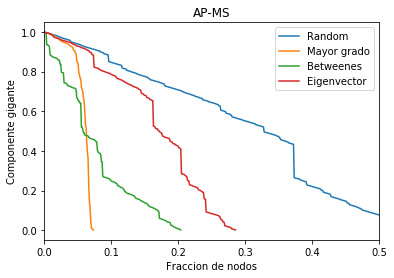

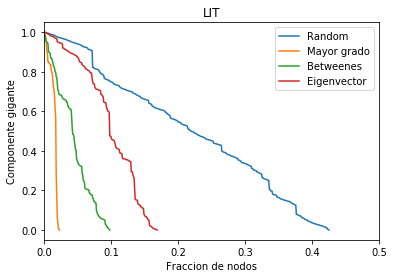

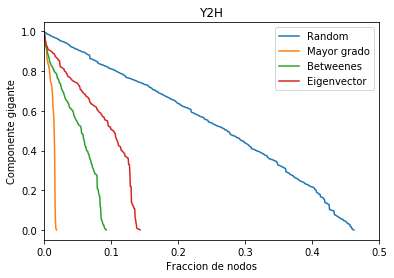

In [13]:
plt.figure()
plt.plot(pasos_random_G,nodos_random_G,label="Random")
plt.plot(pasos_grado_G,nodos_grado_G,label="Mayor grado")
plt.plot(pasos_between_G,nodos_between_G,label="Betweenes")
plt.plot(pasos_eigen_G,nodos_eigen_G,label="Eigenvector")
plt.legend();plt.title("AP-MS");plt.xlabel('Fraccion de nodos');plt.ylabel('Componente gigante');plt.xlim([0,0.5])
plt.figure()
plt.plot(pasos_random_H,nodos_random_H,label="Random")
plt.plot(pasos_grado_H,nodos_grado_H,label="Mayor grado")
plt.plot(pasos_between_H,nodos_between_H,label="Betweenes")
plt.plot(pasos_eigen_H,nodos_eigen_H,label="Eigenvector")
plt.legend();plt.title("LIT");plt.xlabel('Fraccion de nodos');plt.ylabel('Componente gigante');plt.xlim([0,0.5])
plt.figure()
plt.plot(pasos_random_J,nodos_random_J,label="Random")
plt.plot(pasos_grado_J,nodos_grado_J,label="Mayor grado")
plt.plot(pasos_between_J,nodos_between_J,label="Betweenes")
plt.plot(pasos_eigen_J,nodos_eigen_J,label="Eigenvector")
plt.legend();plt.title("Y2H");plt.xlabel('Fraccion de nodos');plt.ylabel('Componente gigante');plt.xlim([0,0.5])
plt.show()

# Tabla 3 Zotenko

## Saco nodos esenciales al azar

In [54]:
def saco_esenciales(RED):
    GG_es=RED.copy()
    Componente_Gigante_INT_es=sorted(nx.connected_components(GG_es), key=len, reverse=True)[0]
    Componente_Gigante_es = GG_es.subgraph(Componente_Gigante_INT_es)
    cantidad_nodos_gigante = len(Componente_Gigante_es)

    GG_nes=GG_es.copy()
    Componente_Gigante_INT_nes=sorted(nx.connected_components(GG_nes), key=len, reverse=True)[0]
    Componente_Gigante_nes = GG_nes.subgraph(Componente_Gigante_INT_nes)

    #Armo lista con nodos esenciales
    esenciales = []
    no_esenciales = []
    for (p, d) in Componente_Gigante_es.nodes(data=True):
        if d['es'] == 1:
            esenciales.append(p)
        else:
            no_esenciales.append(p)

    esenciales=np.random.choice(esenciales,len(esenciales),replace=False) #Mezcla esenciales
    esenciales=np.ndarray.tolist(esenciales)

    no_esenciales=np.random.choice(no_esenciales,len(no_esenciales),replace=False) #Mezcla esenciales
    no_esenciales=np.ndarray.tolist(no_esenciales)

    grados_no_esenciales = [gra for (nom,gra) in Componente_Gigante_nes.degree(no_esenciales)]
    Grados_ne = np.asarray(grados_no_esenciales)
    Grados_ne_lista=np.ndarray.tolist(Grados_ne)

    grados_esenciales = [gra for (nom,gra) in Componente_Gigante_es.degree(esenciales)]
    Grados_e = np.asarray(grados_esenciales)
    Grados_e_lista=np.ndarray.tolist(Grados_e)

    paso=0
    pasos=[]
    dg_esencial=[]
    dg_no_esencial=[]
    grado=[]
    # La condición ahora es que aún existan nodos esenciales en la componente gigante
    while len(esenciales)>0 and len(no_esenciales)>0:
        if esenciales[0] in GG_es.nodes():
            nodo_random_esencial=esenciales[0]
            grado_es=RED.degree(nodo_random_esencial)
            if grado_es in Grados_ne:

                ind=Grados_ne_lista.index(grado_es)
                grado_nes=Grados_ne_lista[ind]

                nodo_random_no_esencial=no_esenciales[ind]
                GG_es.remove_node(nodo_random_esencial)
                GG_nes.remove_node(nodo_random_no_esencial)

                esenciales.remove(nodo_random_esencial)
                no_esenciales.remove(nodo_random_no_esencial)
                Grados_ne_lista.remove(grado_nes)
                Grados_e_lista.remove(grado_es)

                Componente_Gigante_INT_es=sorted(nx.connected_components(GG_es), key=len, reverse=True)[0]
                Componente_Gigante_es = GG_es.subgraph(Componente_Gigante_INT_es)
                GG_es=Componente_Gigante_es.copy()

                Componente_Gigante_INT_nes=sorted(nx.connected_components(GG_nes), key=len, reverse=True)[0]
                Componente_Gigante_nes = GG_nes.subgraph(Componente_Gigante_INT_nes)
                GG_nes=Componente_Gigante_nes.copy()

                grados_no_esenciales = [gra for (nom,gra) in RED.degree(no_esenciales)]
                Grados_ne = np.asarray(grados_no_esenciales)
                Grados_ne_lista=np.ndarray.tolist(Grados_ne)

                grados_esenciales = [gra for (nom,gra) in RED.degree(esenciales)]
                Grados_e = np.asarray(grados_esenciales)
                Grados_e_lista=np.ndarray.tolist(Grados_e)

                no_esenciales = []
                for (p, d) in GG_nes.nodes(data=True):
                    if d['es'] == 0:
                        no_esenciales.append(p)

                paso+=1
                fraccion_es=len(Componente_Gigante_es)/cantidad_nodos_gigante
                fraccion_nes=len(Componente_Gigante_nes)/cantidad_nodos_gigante
                dg_esencial.append(fraccion_es)
                dg_no_esencial.append(fraccion_nes)
                pasos.append(paso/cantidad_nodos_gigante)
                grados.append(grado_es)
            else:
                Grados_e_lista.remove(RED.degree(esenciales[0]))
                esenciales.remove(esenciales[0])         
        else:
            Grados_e_lista.remove(RED.degree(esenciales[0]))
            esenciales.remove(esenciales[0]) 
    return(pasos,dg_esencial,dg_no_esencial)           

## Aplico N veces para obtener una distribución a las 3 redes

### Red AP-MS

In [ ]:
N=30
G_nodos_sacados_lista=[]
G_nodos_restantes_esencial_lista=[]
G_nodos_restantes_no_esencial_lista=[]
for i in range(N):
    nodos_sacados,nodos_restantes_esencial,nodos_restantes_no_esencial=saco_esenciales(G)
    G_nodos_sacados_lista.append(nodos_sacados)
    G_nodos_restantes_esencial_lista.append(nodos_restantes_esencial)
    G_nodos_restantes_no_esencial_lista.append(nodos_restantes_no_esencial)
    #print(i/N)

### Red LIT

In [ ]:
H_nodos_sacados_lista=[]
H_nodos_restantes_esencial_lista=[]
H_nodos_restantes_no_esencial_lista=[]
for i in range(N):
    nodos_sacados,nodos_restantes_esencial,nodos_restantes_no_esencial=saco_esenciales(H)
    H_nodos_sacados_lista.append(nodos_sacados)
    H_nodos_restantes_esencial_lista.append(nodos_restantes_esencial)
    H_nodos_restantes_no_esencial_lista.append(nodos_restantes_no_esencial)
    #print(i/N)

### Red Y2H

In [ ]:
J_nodos_sacados_lista=[]
J_nodos_restantes_esencial_lista=[]
J_nodos_restantes_no_esencial_lista=[]
for i in range(N):
    nodos_sacados,nodos_restantes_esencial,nodos_restantes_no_esencial=saco_esenciales(J)
    J_nodos_sacados_lista.append(nodos_sacados)
    J_nodos_restantes_esencial_lista.append(nodos_restantes_esencial)
    J_nodos_restantes_no_esencial_lista.append(nodos_restantes_no_esencial)
    #print(i/N)

## Grafico para las 3 redes

In [ ]:
for i in range(len(G_nodos_sacados_lista)):
    plt.plot(G_nodos_sacados_lista[i],G_nodos_restantes_esencial_lista[i],'r')
    plt.plot(G_nodos_sacados_lista[i],G_nodos_restantes_no_esencial_lista[i],'b')
plt.plot(G_nodos_sacados_lista[i],G_nodos_restantes_esencial_lista[i],'r',label='Esenciales')
plt.plot(G_nodos_sacados_lista[i],G_nodos_restantes_no_esencial_lista[i],'b',label='NO esenciales')
plt.legend();plt.title('AP-MS')
plt.show()
for i in range(len(H_nodos_sacados_lista)):
    plt.plot(H_nodos_sacados_lista[i],H_nodos_restantes_esencial_lista[i],'r')
    plt.plot(H_nodos_sacados_lista[i],H_nodos_restantes_no_esencial_lista[i],'b')
plt.plot(H_nodos_sacados_lista[i],H_nodos_restantes_esencial_lista[i],'r',label='Esenciales')
plt.plot(H_nodos_sacados_lista[i],H_nodos_restantes_no_esencial_lista[i],'b',label='NO esenciales')
plt.legend();plt.title('LIT')
plt.show()
for i in range(len(J_nodos_sacados_lista)):
    plt.plot(J_nodos_sacados_lista[i],J_nodos_restantes_esencial_lista[i],'r')
    plt.plot(J_nodos_sacados_lista[i],J_nodos_restantes_no_esencial_lista[i],'b')
plt.plot(J_nodos_sacados_lista[i],J_nodos_restantes_esencial_lista[i],'r',label='Esenciales')
plt.plot(J_nodos_sacados_lista[i],J_nodos_restantes_no_esencial_lista[i],'b',label='NO esenciales')
plt.legend();plt.title('Y2H')
plt.show()